Load usefull librairies and packages

In [148]:
import os
import pandas as pd
import nimare as nm 

from nilearn.image import math_img
from nilearn.plotting import plot_stat_map

from nimare.correct import FWECorrector
from nimare.io import convert_sleuth_to_dataset
from nimare.meta.cbma import ALE, ALESubtraction
from nimare.tests.utils import get_test_data_path

from nilearn import plotting
from nilearn.plotting import view_img
import matplotlib.pyplot as plt 
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

Loading files and convert it into sleuth file so nimare could read it 

In [154]:
need_file = ('/Users/laurencegrenier/Desktop/Fasted-satieted_hunge in response to relevant stimuli - copie (1) - copie.txt')

want_file = ('/Users/laurencegrenier/Desktop/coordonnées désir-wants all (1) - copie.txt')

need_set = convert_sleuth_to_dataset(need_file)

want_set = convert_sleuth_to_dataset(want_file)

In [155]:
import nimare
nimare.__version__ #verify nimare version in order to be able to plot the correct MA map 

'0.0.10rc2'

Generating the ALE analysis for both conditions 

In [126]:
ale = ALE(null_method="approximate")
res = ale.fit(need_set)
res2 = ale.fit(want_set)

corr = FWECorrector(method="montecarlo", voxel_thresh=0.05, n_iters=100, n_cores=1) 
cres = corr.transform(res)
cres2 = corr.transform(res2) 

#using a liberal thresold in order to be able to compare the results with the classification model


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


Generating images and plot it into interactive images

In [147]:
img = cres.get_map("z_level-cluster_corr-FWE_method-montecarlo")

img2 = cres2.get_map("z_level-cluster_corr-FWE_method-montecarlo")


In [100]:
color = nilearn_cmaps['black_purple_r']

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



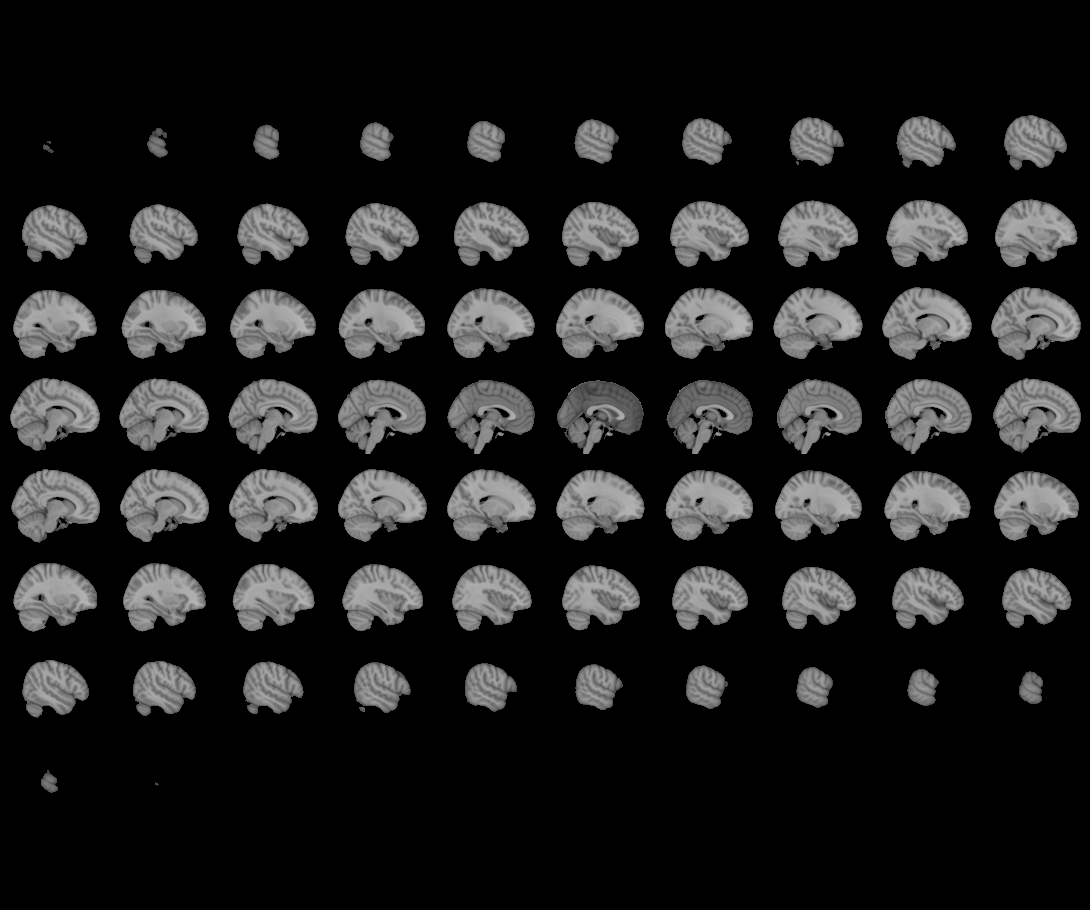
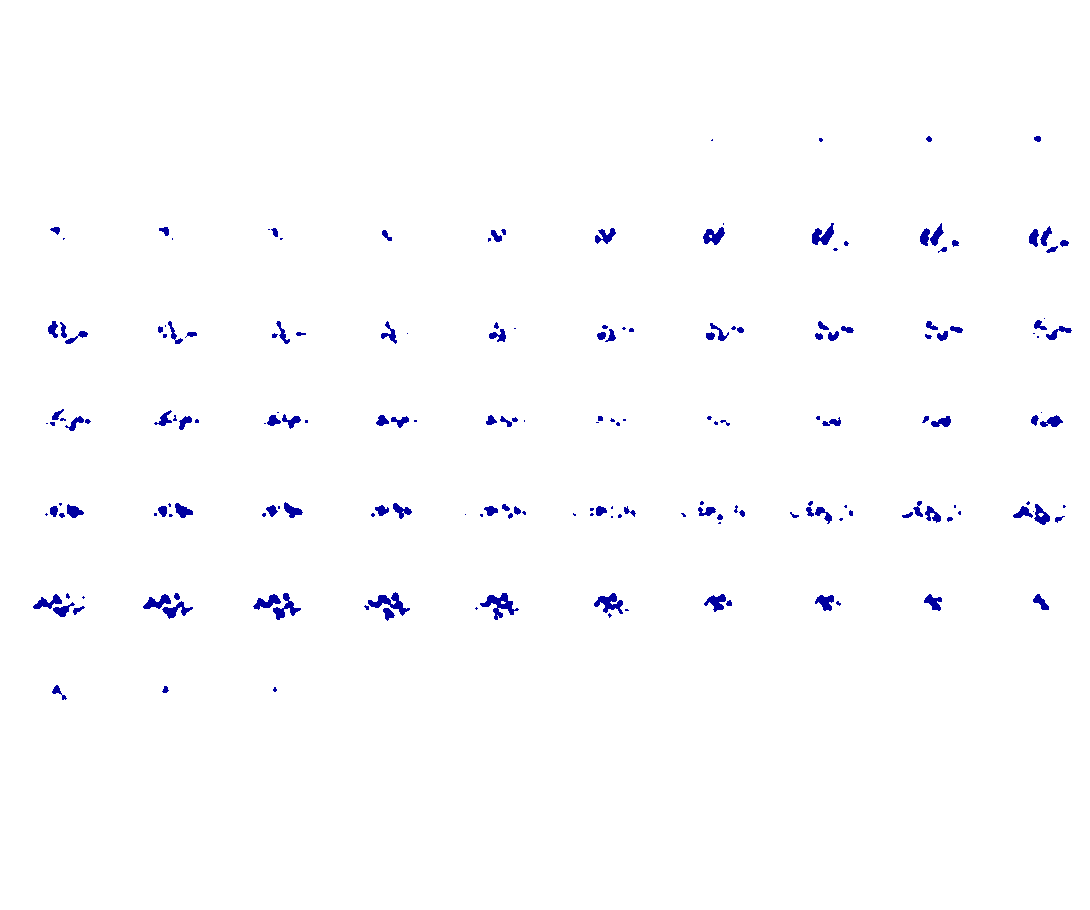

In [158]:
img_ALE_need = plotting.view_img(img, threshold="90%", cmap = color, symmetric_cmap = False, vmin = 0, vmax = 3)
img_ALE_need

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



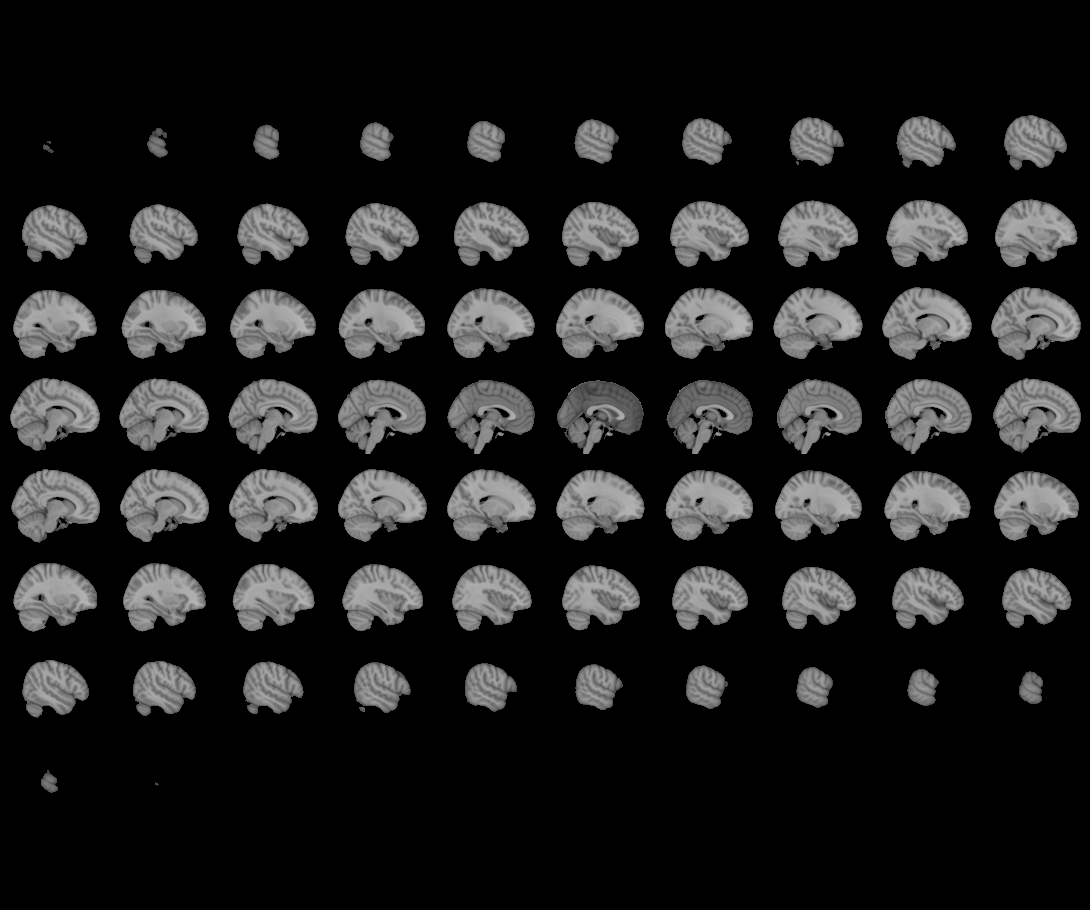
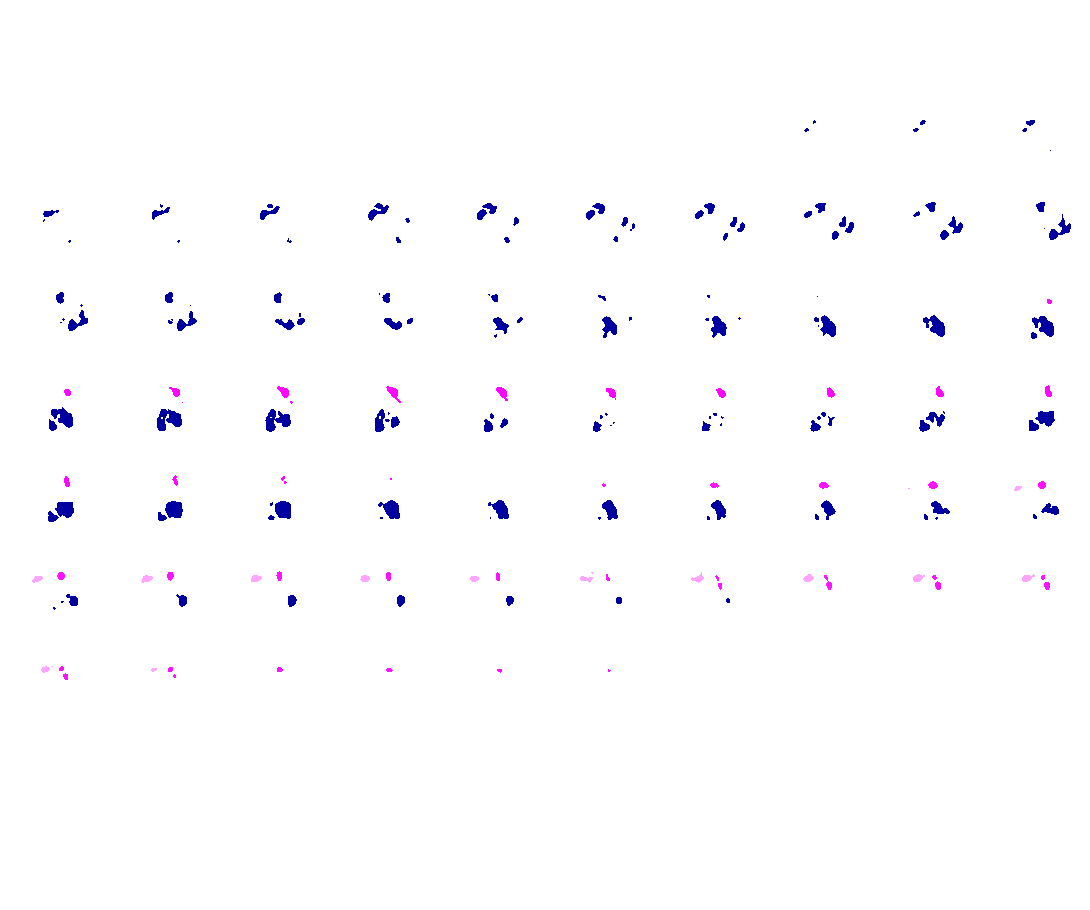

In [159]:
img_ALE_want = plotting.view_img(img2, cmap = color, threshold="90%", symmetric_cmap = False, vmin = 0, vmax = 3)
img_ALE_want

In [160]:
#Save the image 
img_ALE_need.save_as_html("Need_ALE_Img.html")
img_ALE_want.save_as_html("Want_ALE_Img.html")

Do the ALE subtraction

In [162]:
#Need > Want
sub1 = ALESubtraction(n_iters=100, memory_limit=None)
res_sub1 = sub1.fit(need_set, want_set)
img_sub1 = res_sub1.get_map("z_desc-group1MinusGroup2")

In [109]:
color2 = nilearn_cmaps['cold_hot_r']

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



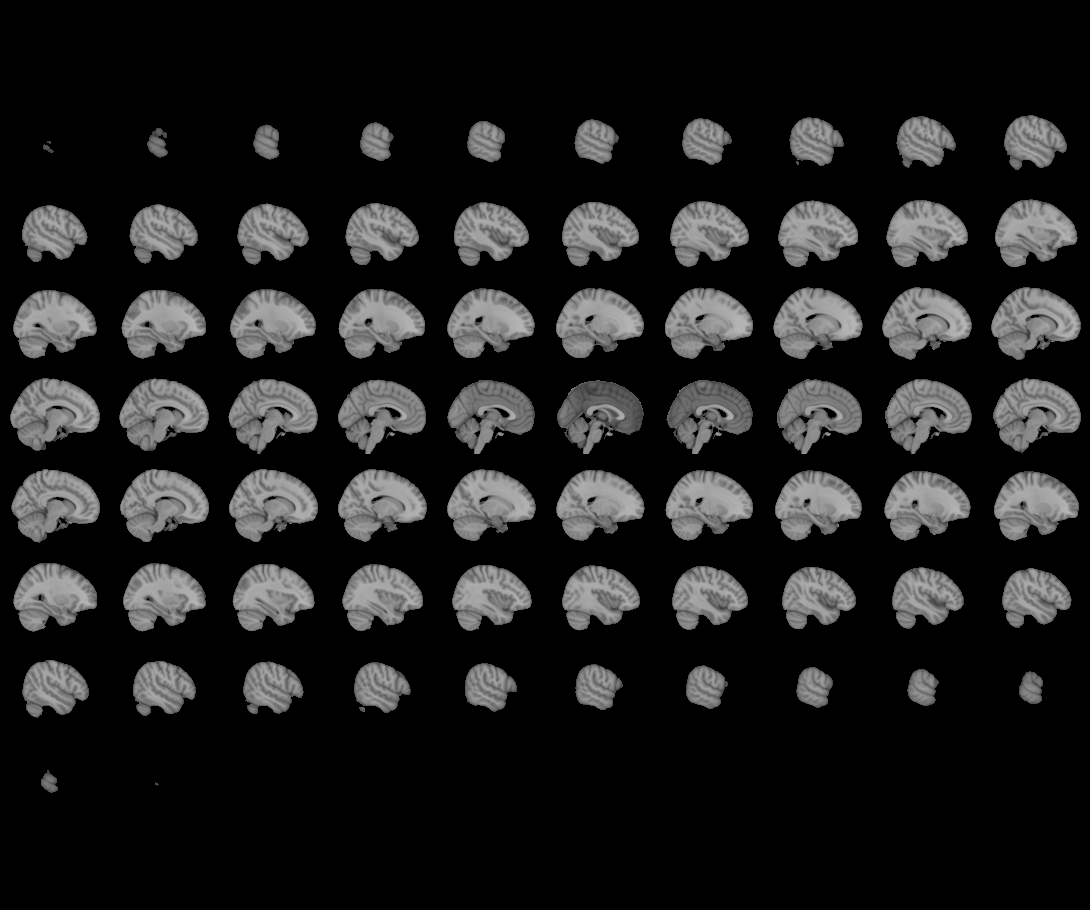
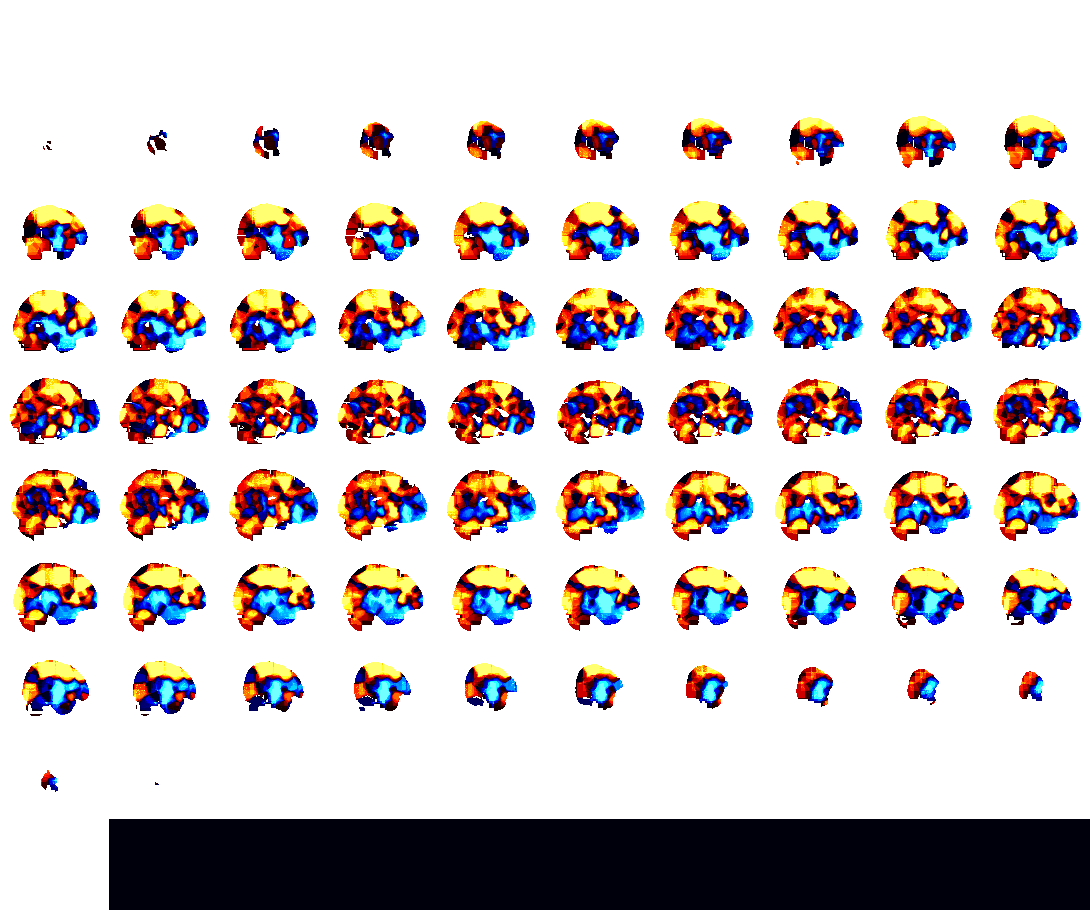

In [163]:
#Generating the image 
need_minus_want_img = plotting.view_img(img_sub1, cmap = color2, vmax= 3, title = 'Subtraction Need > Want')
need_minus_want_img

In [164]:
#save the image
need_minus_want_img.save_as_html("need_minus_want_img.html")

In [165]:
#Want > Need
sub2 = ALESubtraction(n_iters=100, memory_limit=None)
res_sub2 = sub2.fit(want_set, need_set)
img_sub2 = res_sub2.get_map("z_desc-group1MinusGroup2")

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



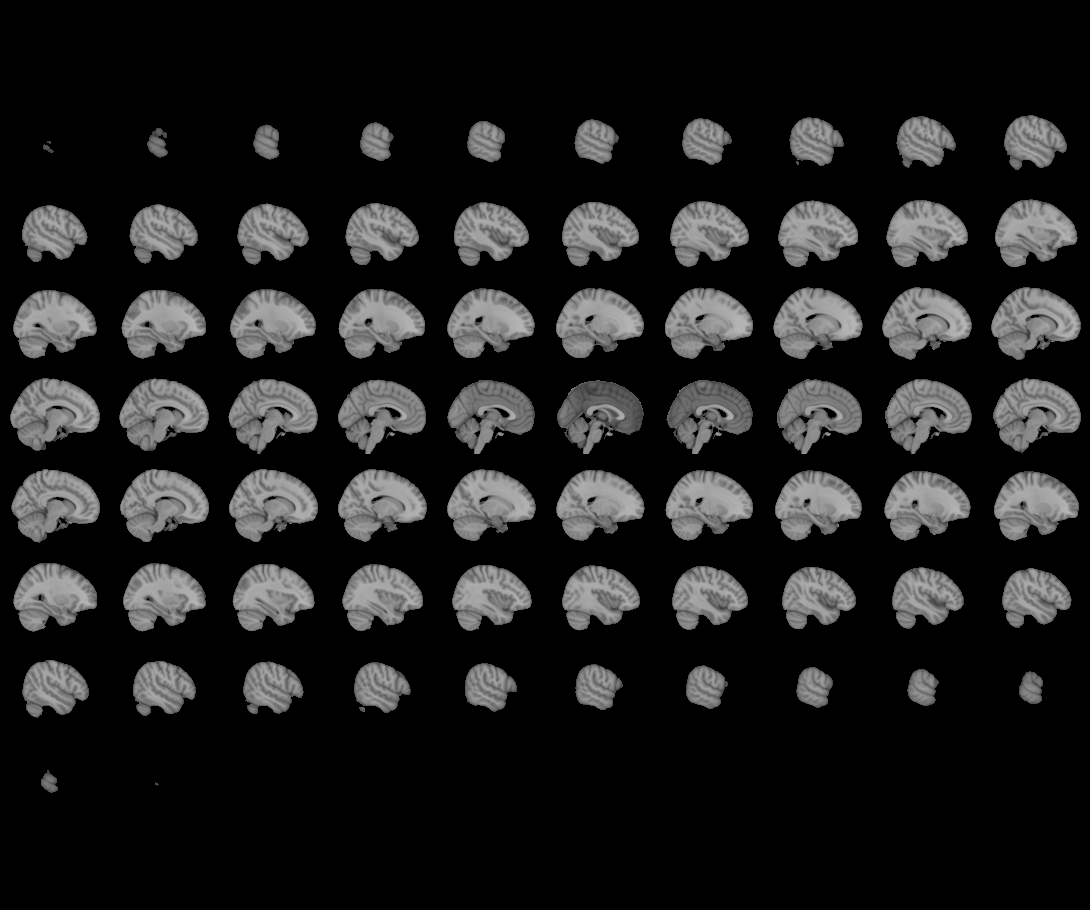
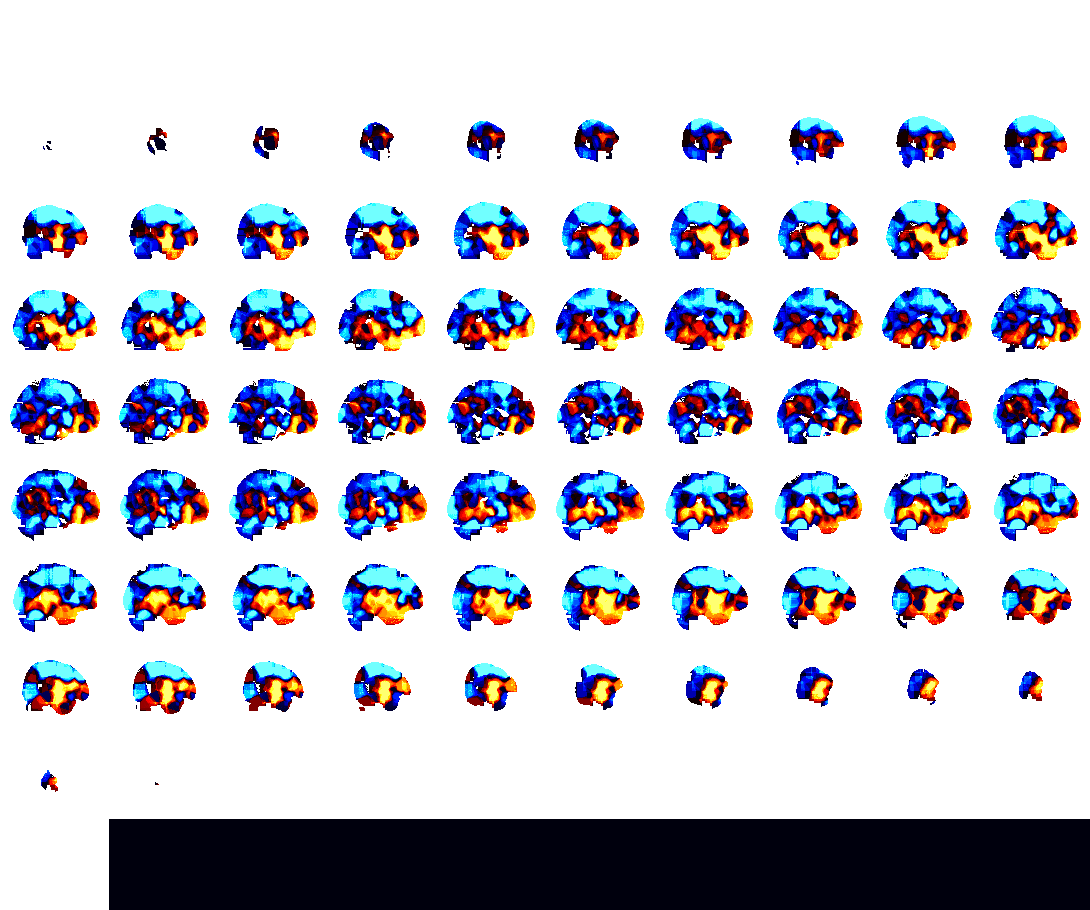

In [168]:
#Generating image
want_minus_need_img = plotting.view_img(img_sub2, cmap = color2, vmax= 3, title = 'Subtraction Want > Need')
want_minus_need_img

#Must be the opposite of the Subtraction Need > Want

In [169]:
#Save the image
want_minus_need_img.save_as_html("want_minus_need_img.html")

Do the conjunction analysis 

In [170]:
formula = "np.where(img * img2 > 0, np.minimum(img, img2), 0)"
img_conj = math_img(formula, img=img, img2=img2)

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



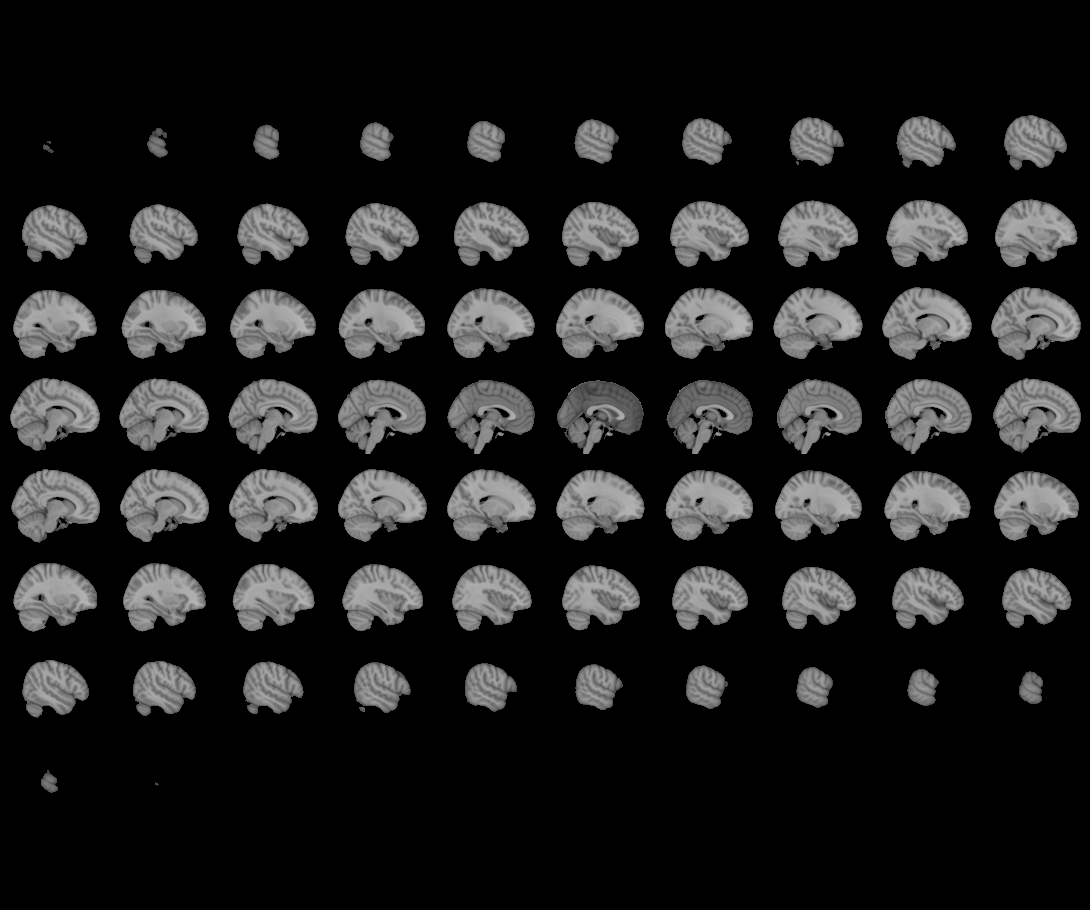
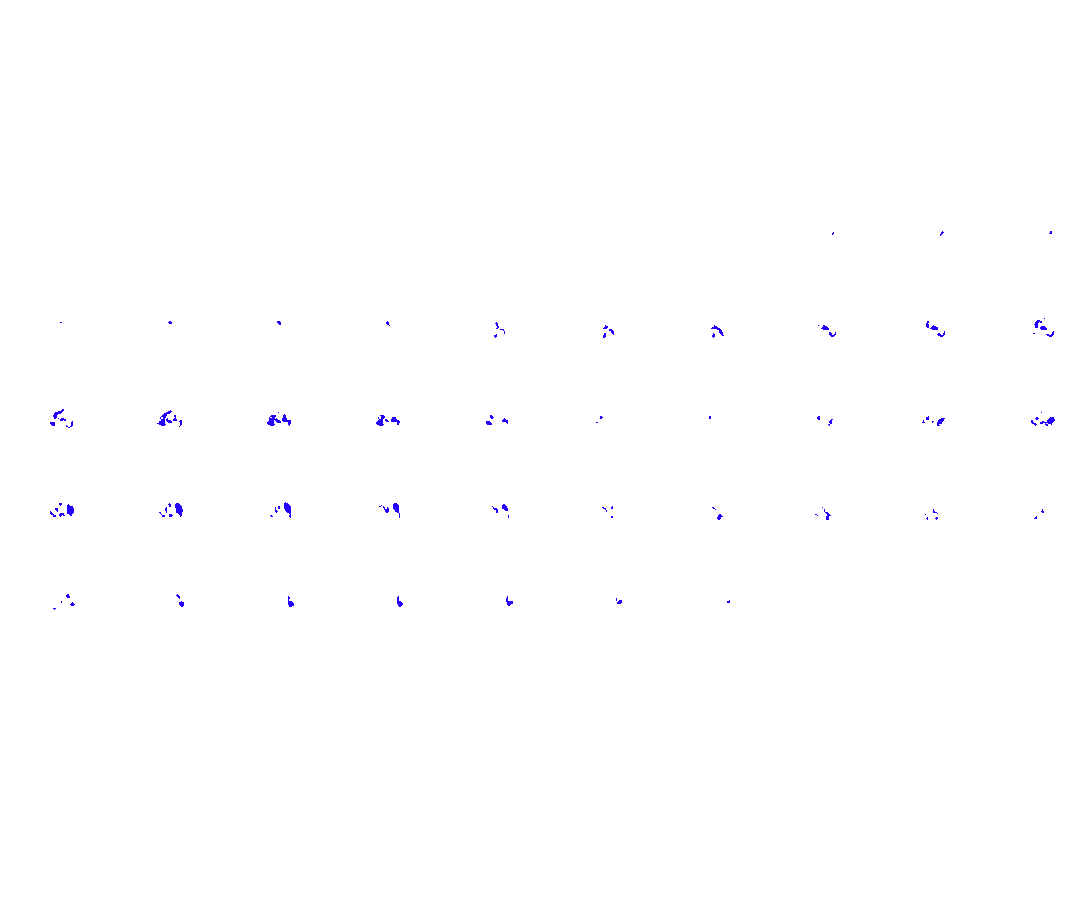

In [171]:
#Generating image
conjunction_img = plotting.view_img(img_conj, cmap = color, symmetric_cmap= False, vmin = 1, vmax = 4, title = 'Conjunction analysis Need and Want')
conjunction_img

In [172]:
#Save the image
conjunction_img.save_as_html("conjunction_img.html")